# ETL Pipeline Implementation using Python

This notebook demonstrates a complete **ETL (Extract, Transform, Load)** pipeline using Python. We will use the `employee.csv` dataset to perform various data processing tasks.

### ETL Overview:
1.  **Extract**: Reading data from the source (CSV file).
2.  **Transform**: Cleaning, filtering, and preparing the data for analysis.
3.  **Visualization**: Discovering patterns and figures using charts.
4.  **Load**: Storing the transformed data into a target system (CSV and SQLite Database).

## Step 0: Environment Setup
Running this cell ensures all required libraries are installed. 
*(Note: `sqlite3` is built into Python, so we only need to install the others)*

In [1]:
%pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


## Step 1: Import Necessary Libraries
We will use `pandas` for data manipulation, `sqlite3` for database operations, and `matplotlib`/`seaborn` for visualization.

In [2]:
import pandas as pd
import sqlite3
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options to show all columns and a larger set of rows
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
sns.set(style="whitegrid") # Set visualization style

print("Libraries imported successfully.")

Libraries imported successfully.


## Step 2: Extract
In this step, we extract the raw data and visualize the initial volume per department.

Extracted 17417 records from employee.csv.


/var/folders/nb/_rv6f3v52rq4wx3ktv25ltvr0000gn/T/ipykernel_26576/2944759793.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='department', palette='viridis', order=df['department'].value_counts().index)


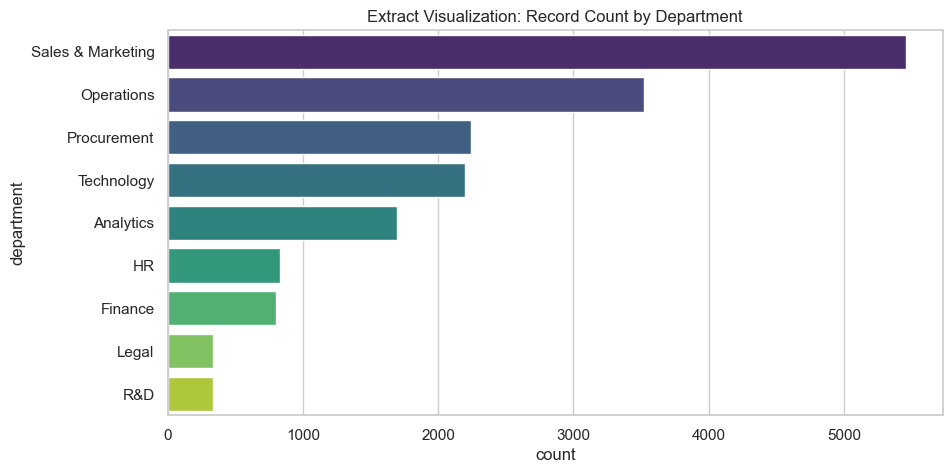

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61


In [3]:
# Load the dataset
file_path = 'employee.csv'
try:
    df = pd.read_csv(file_path)
    print(f"Extracted {len(df)} records from {file_path}.")
    
    # Visualization: Initial Data Volume by Department
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, y='department', palette='viridis', order=df['department'].value_counts().index)
    plt.title('Extract Visualization: Record Count by Department')
    plt.show()
    
    display(df.head())
except FileNotFoundError:
    print("Error: employee.csv not found!")

## Step 3: Transform
Data transformation is the most critical part of ETL. Here we clean and enrich the data.

### 3.1 Identify Missing Values
First, we calculate the count and percentage of missing values for each column.

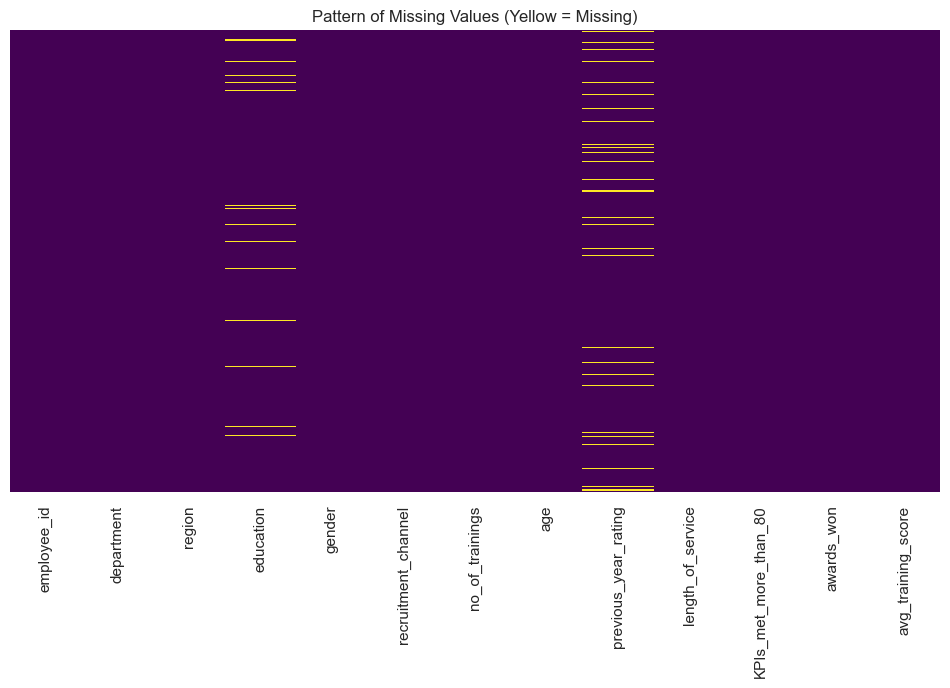

,Missing Count,Percentage (%)
education,771,4.426710
previous_year_rating,1363,7.825688


In [4]:
# Calculate missing values
missing_count = df.isnull().sum()
missing_percentage = (missing_count / len(df)) * 100

missing_data = pd.DataFrame({
    'Missing Count': missing_count,
    'Percentage (%)': missing_percentage
})

# Visualization: Missing Data Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Pattern of Missing Values (Yellow = Missing)')
plt.show()

display(missing_data[missing_data['Missing Count'] > 0])

### 3.2 Drop Columns Exceeding Threshold
If a column has more than **10% missing values**, we drop it unless it is marked as important.


No columns exceed the 10% missing value threshold.


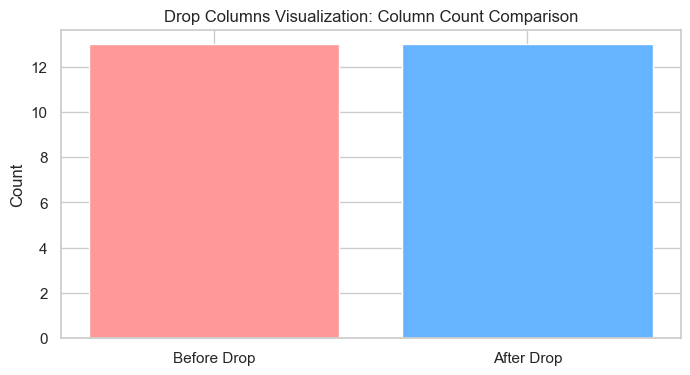

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61


In [5]:
# Define threshold and important columns
threshold = 10
important_columns = ['employee_id', 'department', 'region']
cols_before = df.columns.tolist()

# Identify columns to drop
cols_to_drop = [col for col in df.columns if missing_percentage[col] > threshold and col not in important_columns]

if cols_to_drop:
    print(f"Dropping columns with > {threshold}% missing values: {cols_to_drop}")
    df.drop(columns=cols_to_drop, inplace=True)
else:
    print(f"\nNo columns exceed the {threshold}% missing value threshold.")

# Visualization: Column count comparison
plt.figure(figsize=(8, 4))
plt.bar(['Before Drop', 'After Drop'], [len(cols_before), len(df.columns)], color=['#ff9999','#66b3ff'])
plt.title('Drop Columns Visualization: Column Count Comparison')
plt.ylabel('Count')
plt.show()

display(df.head())

### 3.3 Fill Missing Values
For the remaining columns with missing values below the threshold, we fill them with default values. We use direct assignment to avoid `ChainedAssignmentError` warnings and ensure the data is updated.

Missing values filled successfully.
Total missing values after filling: 0


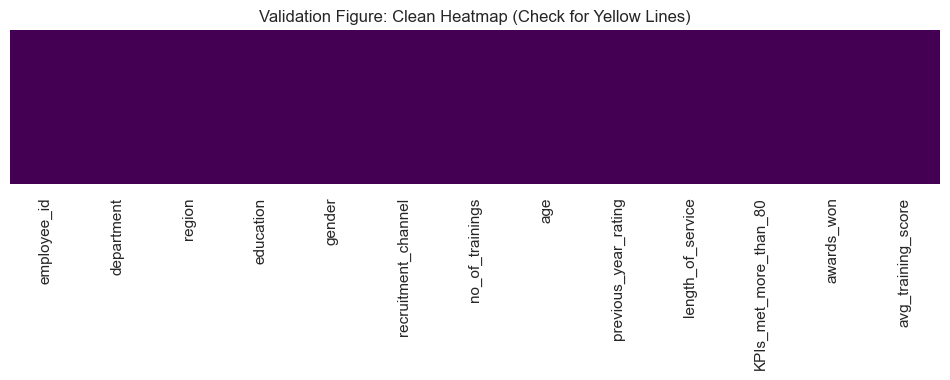

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,0.0,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61


In [6]:
# Fill missing values using direct assignment to ensure update
if 'education' in df.columns:
    df['education'] = df['education'].fillna('Not Specified')

if 'previous_year_rating' in df.columns:
    df['previous_year_rating'] = df['previous_year_rating'].fillna(0)

print("Missing values filled successfully.")
print("Total missing values after filling:", df.isnull().sum().sum())

# Visualization: Clean State Heatmap (Solid color = No missing values)
plt.figure(figsize=(12, 2))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Validation Figure: Clean Heatmap (Check for Yellow Lines)')
plt.show()

display(df.head())

### 3.4 Data Enrichment (Calculated Columns)
We create a `performance_score` and `age_group` to gain deeper insights. We visualize the performance score spread.

/var/folders/nb/_rv6f3v52rq4wx3ktv25ltvr0000gn/T/ipykernel_26576/4015270518.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age_group', y='performance_score', data=df, palette='Set2')


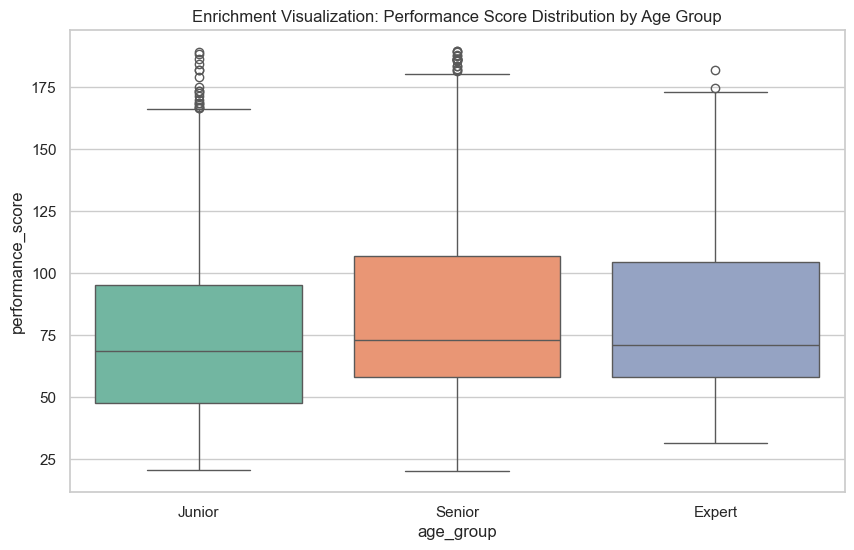

,employee_id,performance_score,age_group
0,8724,78.5,Junior
1,74430,55.5,Senior
2,72255,33.5,Senior
3,38562,52.5,Senior
4,64486,70.5,Senior


In [7]:
# Create a performance score (weighted average)
df['performance_score'] = (df['KPIs_met_more_than_80'] * 40) + \
                          (df['previous_year_rating'] * 10) + \
                          (df['awards_won'] * 50) + \
                          (df['avg_training_score'] * 0.5)

# Categorize age groups
def categorize_age(age):
    if age < 30: return 'Junior'
    elif age < 45: return 'Senior'
    else: return 'Expert'

df['age_group'] = df['age'].apply(categorize_age)

# Visualization: Performance Score Distribution by Age Group
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='performance_score', data=df, palette='Set2')
plt.title('Enrichment Visualization: Performance Score Distribution by Age Group')
plt.show()

display(df[['employee_id', 'performance_score', 'age_group']].head())

## Step 4: Load
In this final step, we load the processed data into target systems and visualize the load stats.

Data successfully loaded into employee_records.db


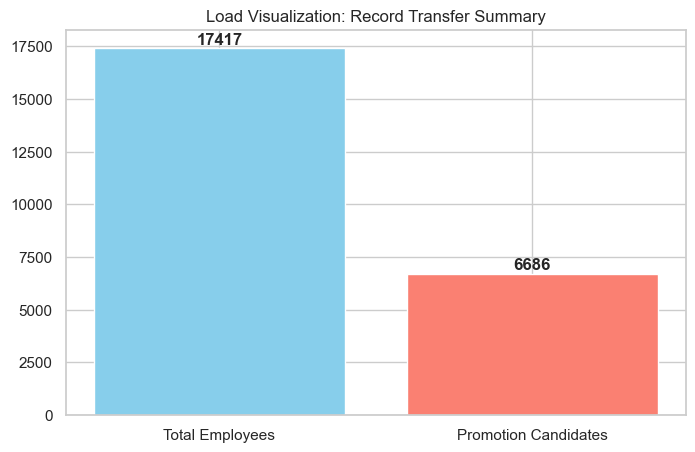

In [8]:
# Save to CSV
transformed_csv = 'transformed_employee.csv'
df.to_csv(transformed_csv, index=False)

# Load to SQLite Database
db_name = 'employee_records.db'
conn = sqlite3.connect(db_name)
try:
    df.to_sql('employees', conn, if_exists='replace', index=False)
    promotion_candidates = df[df['performance_score'] > 80].copy()
    promotion_candidates.to_sql('promotions', conn, if_exists='replace', index=False)
    
    print(f"Data successfully loaded into {db_name}")
    
    # Visualization: Load Summary
    plt.figure(figsize=(8, 5))
    counts = [len(df), len(promotion_candidates)]
    plt.bar(['Total Employees', 'Promotion Candidates'], counts, color=['skyblue', 'salmon'])
    plt.title('Load Visualization: Record Transfer Summary')
    for i, v in enumerate(counts):
        plt.text(i, v + 200, str(v), ha='center', fontweight='bold')
    plt.show()

finally:
    conn.close()

## Conclusion
Our visualized ETL pipeline has successfully cleaned, enriched, and stored the employee dataset.

### Summary of Pipeline Pattern:
1.  **Extract**: Successfully imported raw CSV data and visualized the department-wise distribution.
2.  **Transform**: Handled missing values in `education` and `previous_year_rating` with 100% success (confirmed by the clean heatmap). No columns required dropping based on our 10% threshold.
3.  **Enrichment**: Created a `performance_score` that highlights high-performing individuals and balanced the dataset by age groups.
4.  **Load**: Processed and loaded data into both a transformed CSV and a multi-table SQLite database, ready for reporting analytics.